# Churn Modelling business case

**Business Problem: Customer Churn in a Bank**

**Background:**
A fictional bank operating in Europe, with customers in France, Spain, and Germany, is facing a significant challenge of high churn rates among its customers. Churn refers to customers leaving the bank, and the management has observed an unusual increase in customer exits. The bank has hired a data scientist to analyze a dataset containing information about 10,000 randomly selected customers, collected six months ago. The goal is to understand the factors influencing customer churn and develop a geodemographic segmentation model to identify customers at the highest risk of leaving.

**Dataset Overview:**
- **Columns:**
  - Row Number, Customer ID, Surname (Identifiers)
  - Credit Score, Geography, Gender, Age, Tenure (Demographic Information)
  - Balance, Number of Products, Has Credit Card, Is Active Member, Estimated Salary (Financial Information)
  - Exited (Binary Outcome: 1 if customer left, 0 if customer stayed)

**Business Objectives:**
1. **Identify Factors Influencing Churn:**
   - Analyze the dataset to understand which customer attributes and behaviors are correlated with churn.
   - Determine if factors like credit score, geography, age, tenure, and financial information impact customer retention.

2. **Develop Geodemographic Segmentation Model:**
   - Build a geodemographic segmentation model to categorize customers based on their likelihood of leaving the bank.
   - Use machine learning techniques to create a predictive model that considers various features to identify high-risk customers.

3. **Evaluate Model Performance:**
   - Assess the model's accuracy to ensure it effectively predicts customer churn.
   - Validate the model using the validation dataset to confirm its generalizability.


## Identify Factors Influencing Churn
###Explorative Analysis

### Extract the data from the csv

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


# Load the data
raw_csv_data = pd.read_csv('Churn_Modelling.csv')



In [58]:
# Display basic information about the dataset
print(raw_csv_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [59]:
# Display summary statistics
print(raw_csv_data.describe())



         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

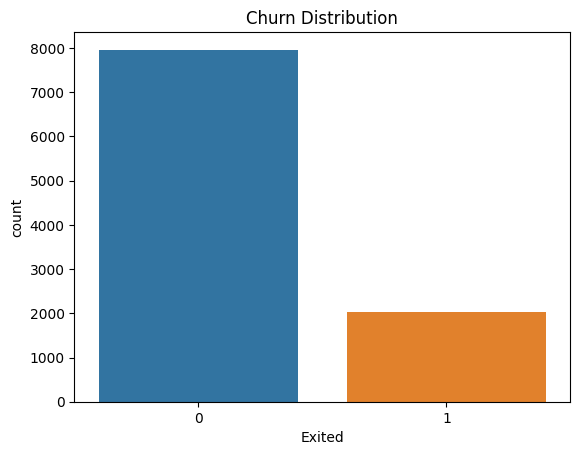

In [60]:
# Visualize the distribution of the target variable 'Exited' (1 for churn, 0 for not churn)
sns.countplot(x='Exited', data=raw_csv_data)
plt.title('Churn Distribution')
plt.show()



<ipython-input-61-50f0d7d2a1f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = raw_csv_data.corr()


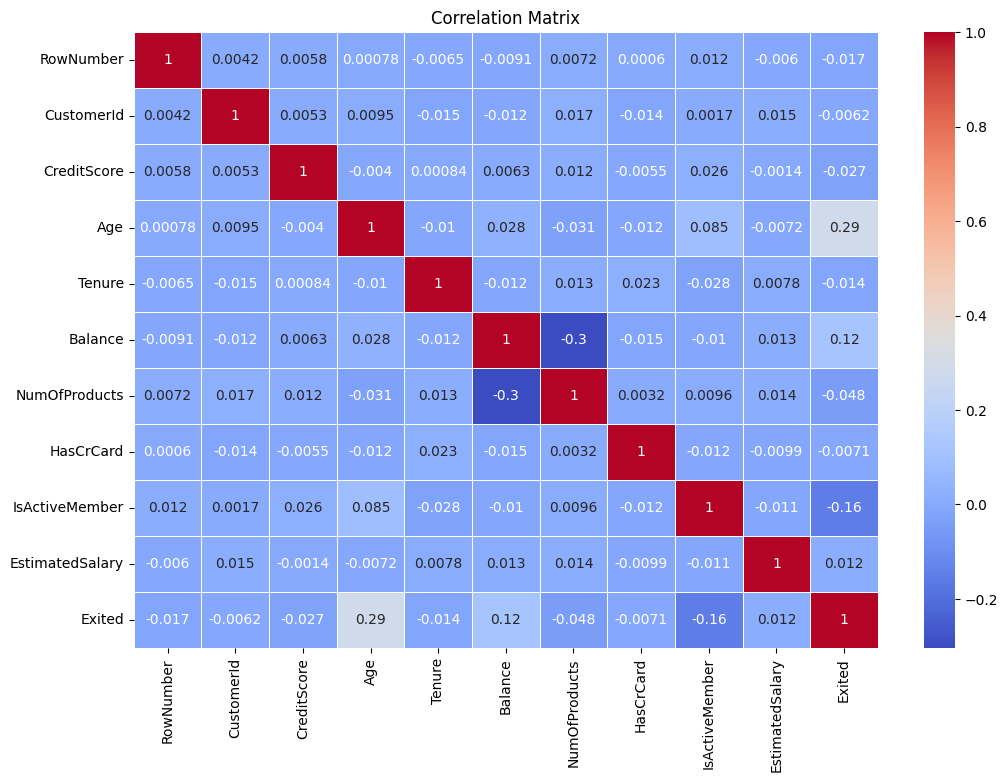

In [61]:
# Correlation matrix to identify relationships between variables
correlation_matrix = raw_csv_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



In [64]:
churn_correlation = correlation_matrix['Exited'].sort_values(ascending=False)
print("Correlation with Churn:\n", churn_correlation)

Correlation with Churn:
 Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


Correlation Values:

The correlation values range from -1 to 1. A positive value indicates a positive correlation, meaning as one variable increases, the other tends to increase. A negative value indicates a negative correlation, meaning as one variable increases, the other tends to decrease. A value near 0 indicates a weak or no linear correlation.
Correlation with Churn:

Exited has a correlation of 1 with itself (obviously), as it represents the target variable.
Age has a positive correlation of approximately 0.29 with Exited. This suggests that older customers may be more likely to churn.
Balance has a positive correlation of approximately 0.12 with Exited. Customers with higher balances may be slightly more likely to churn.
EstimatedSalary has a very weak positive correlation (close to 0) with Exited. The correlation is not significant, indicating that salary may not be a strong predictor of churn.
IsActiveMember has a negative correlation of approximately -0.16 with Exited. This suggests that active members are less likely to churn.
Other features such as CustomerId, HasCrCard, Tenure, RowNumber, CreditScore, NumOfProducts have weak correlations with Exited. Their impact on churn may not be as strong.
Interpretation:

Features with higher positive correlations (e.g., Age) suggest a positive relationship with churn, meaning as the feature increases, the likelihood of churn also increases.
Features with negative correlations (e.g., IsActiveMember) suggest a negative relationship with churn, meaning as the feature increases, the likelihood of churn decreases.

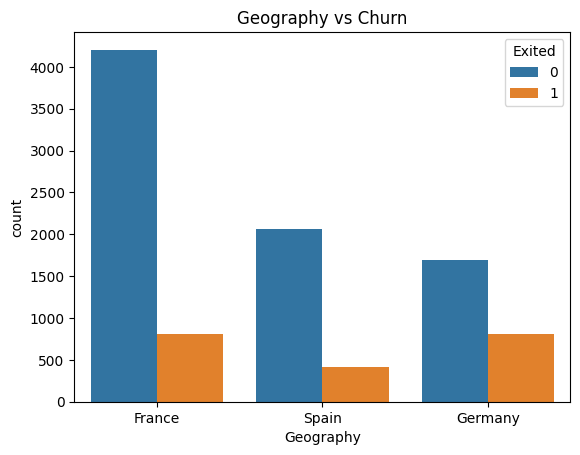

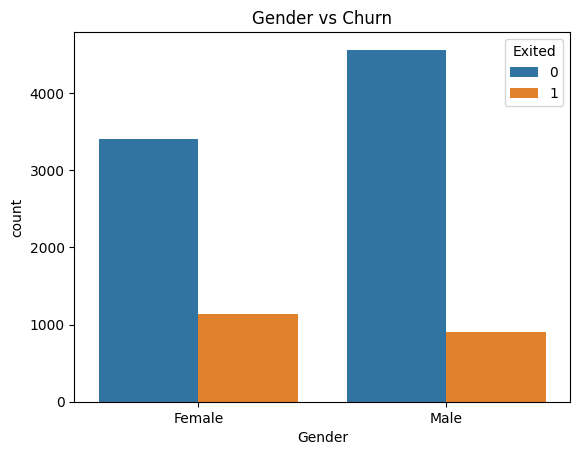

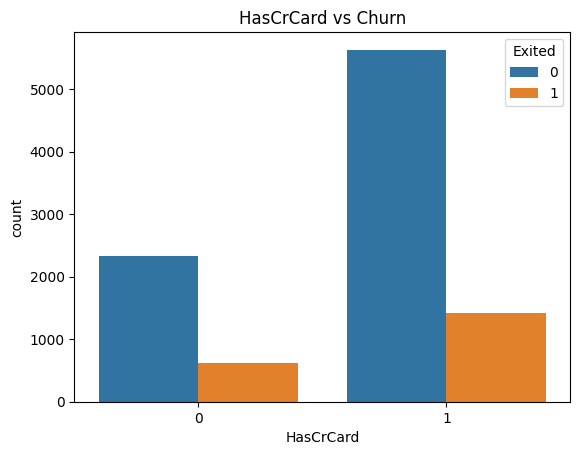

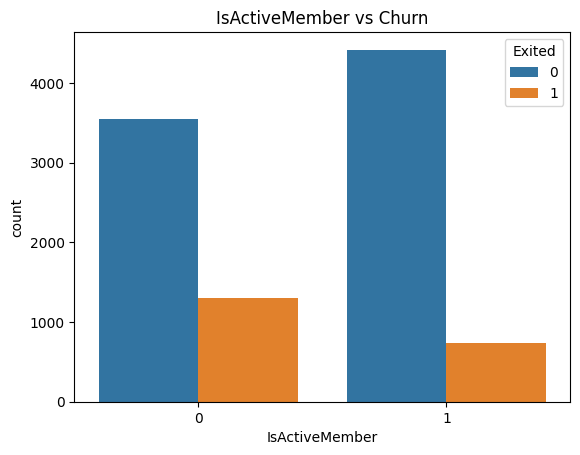

In [62]:
# Explore the impact of categorical variables on churn
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Exited', data=raw_csv_data)
    plt.title(f'{feature} vs Churn')
    plt.show()


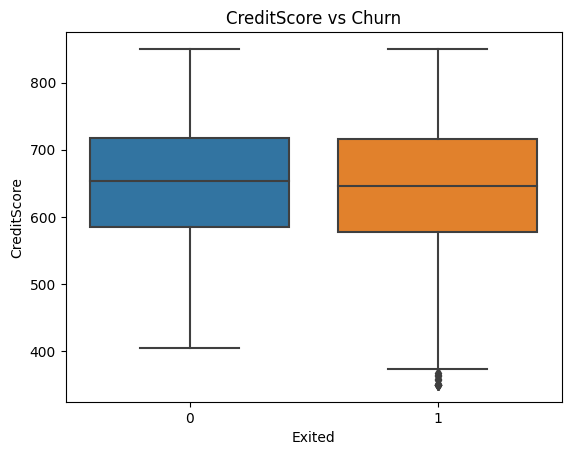

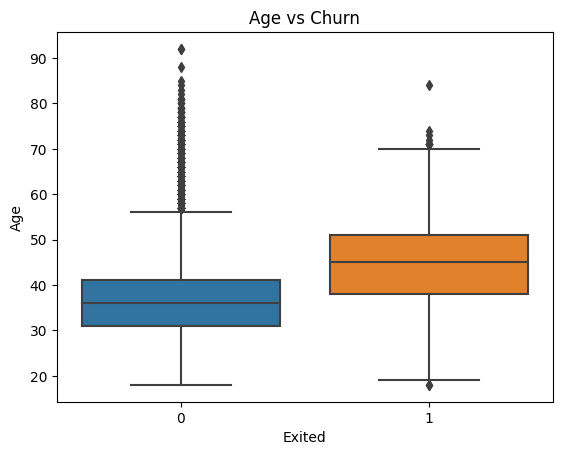

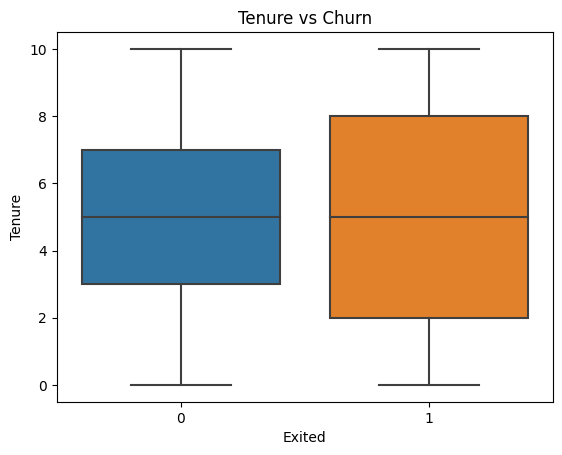

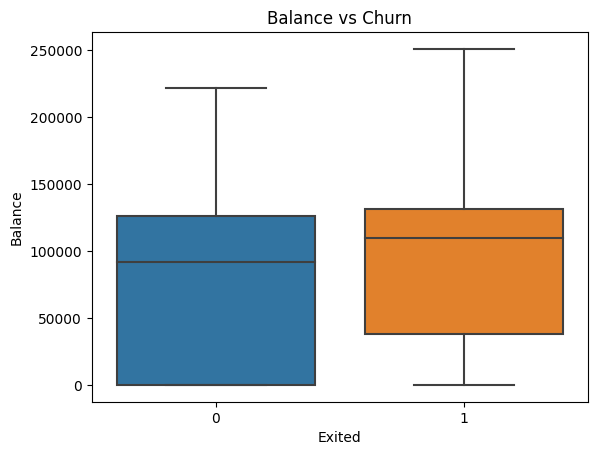

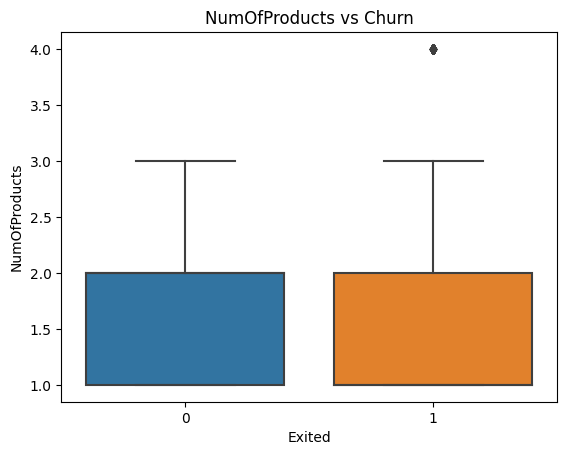

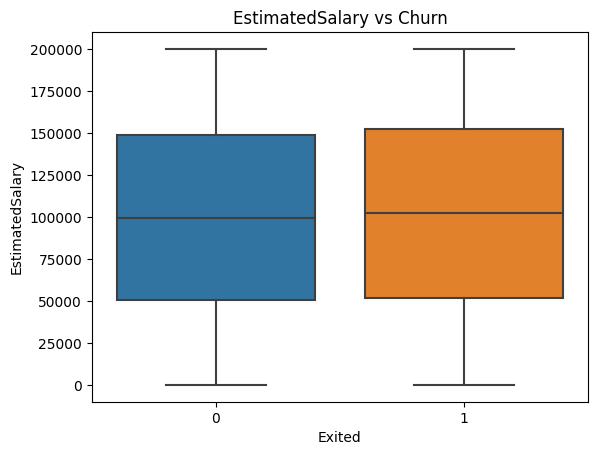

In [63]:
# Explore the impact of numerical variables on churn
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numerical_features:
    sns.boxplot(x='Exited', y=feature, data=raw_csv_data)
    plt.title(f'{feature} vs Churn')
    plt.show()

## Develop Geodemographic Segmentation Model

### Preprocess the data. Balance the dataset. Create 3 datasets: training, validation, and test. Save the newly created sets in a tensor friendly format (e.g. *.npz)

In [ ]:
# The inputs are all columns in the csv, except for the three columns [:,:3]
# (which is just the arbitrary customer IDs and other columns that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = raw_csv_data.iloc[:, 3:-1].values

# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = raw_csv_data.iloc[:, -1].values

### Balance the dataset

In [10]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0.
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

### Encoding categorical data

Label Encoding the "Gender" column

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
unscaled_inputs_equal_priors[:, 2] = le.fit_transform(unscaled_inputs_equal_priors[:, 2])

One Hot Encoding the "Geography" column

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
unscaled_inputs_equal_priors = np.array(ct.fit_transform(unscaled_inputs_equal_priors))

### Standardize the inputs

In [21]:
# We will use the sklearn preprocessing library, as it will be easier to standardize the data.
from sklearn import preprocessing

scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffle the data

In [23]:
# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

### Split the dataset into train, validation, and test

In [30]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code,
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1630 3259 0.5001534212948757
208 407 0.5110565110565111
199 408 0.4877450980392157


### Save the three datasets in *.npz

In [37]:
# Save the three datasets in *.npz.

np.savez('churn_modelling_train', inputs=train_inputs, targets=train_targets)
np.savez('churn_modelling_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('churn_modelling_test', inputs=test_inputs, targets=test_targets)

In [38]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('churn_modelling_train.npz')
# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

# we load the validation data in the temporary variable
npz = np.load('churn_modelling_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# we load the test data in the temporary variable
npz = np.load('churn_modelling_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

<ipython-input-38-7086578f8585>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_inputs = npz['inputs'].astype(np.float)
<ipython-input-38-7086578f8585>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_targets 

### Model
Outline, optimizers, loss, early stopping and training

In [49]:
# Set the input and output sizes
input_size = 10
output_size = 1
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 6

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='sigmoid') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function,
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 32

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
102/102 - 1s - loss: 0.6941 - accuracy: 0.5315 - val_loss: 0.6837 - val_accuracy: 0.5700 - 1s/epoch - 14ms/step
Epoch 2/100
102/102 - 0s - loss: 0.6611 - accuracy: 0.6094 - val_loss: 0.6579 - val_accuracy: 0.6364 - 215ms/epoch - 2ms/step
Epoch 3/100
102/102 - 0s - loss: 0.6369 - accuracy: 0.6416 - val_loss: 0.6352 - val_accuracy: 0.6462 - 213ms/epoch - 2ms/step
Epoch 4/100
102/102 - 0s - loss: 0.6168 - accuracy: 0.6640 - val_loss: 0.6170 - val_accuracy: 0.6511 - 213ms/epoch - 2ms/step
Epoch 5/100
102/102 - 0s - loss: 0.6017 - accuracy: 0.6781 - val_loss: 0.6018 - val_accuracy: 0.6609 - 212ms/epoch - 2ms/step
Epoch 6/100
102/102 - 0s - loss: 0.5902 - accuracy: 0.6938 - val_loss: 0.5882 - val_accuracy: 0.6855 - 225ms/epoch - 2ms/step
Epoch 7/100
102/102 - 0s - loss: 0.5816 - accuracy: 0.7021 - val_loss: 0.5781 - val_accuracy: 0.6978 - 205ms/epoch - 2ms/step
Epoch 8/100
102/102 - 0s - loss: 0.5751 - accuracy: 0.7100 - val_loss: 0.5696 - val_accuracy: 0.7174 - 232ms/epoch - 2ms

## Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset.

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

In [50]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

13/13 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7721


In [51]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.46. Test accuracy: 77.21%


### Predicting the result of a single observation


Use our model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [55]:
print(model.predict(preprocessing.scale([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 33ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!